# Overview of Supervised Learning

In supervised learning, the goal is to construct a model capable of predicting an output y based on an input x. This process, known as inference, can be described by:

$$y = f(x)$$

This equation represents various potential relationships between the input and output. The model includes parameters ϕ, introducing a more refined relationship:

$$y = f(x, \phi)$$

The goal is to adjust parameters to map training inputs to their respective outputs accurately, evaluated using a loss $(L)$, a scalar reflecting the accuracy of predictions for a set of parameters $(\phi)$. The training process seeks to find the optimal parameters $(\overline{\phi})$ that minimize this loss:

$$\begin{equation}
    \overline{\phi} = \text{argmin}[L(\phi)]
\end{equation}$$

  - where:

$$\begin{equation}
    L((x_i, y_i), \phi)
\end{equation}$$

## 1D Linear Regression Model

A 1D linear regression model posits a linear relationship between the input (x) and output (y):

$$\begin{equation}
    y = f(x, \phi) = \phi_{0} + \phi_{1} x
\end{equation}$$

## Loss Evaluation

The choice of parameters $(\phi)$ is guided by a numerical value assigned to each set of parameters, reflecting the degree of fit to the data, termed the loss. This loss is the sum of squared deviations between model predictions and actual outputs across all training pairs:

$$\begin{equation}
    L(\phi) = \sum_{i=1}^{I} (f(x_i, \phi) - y_i)^2 = \sum_{i=1}^{I} (\phi_{0} + \phi_{1} x_i - y_i)^2
\end{equation}$$

The optimal parameters minimize this loss:

$$\begin{equation}
    \overline{\phi} = \text{argmin} \left[ \sum_{i=1}^{I} (\phi_{0} + \phi_{1} x_i - y_i)^2 \right]
\end{equation}$$

## Model Training Means

Training a model involves finding parameters that minimize the loss, typically by starting with random parameters and iteratively adjusting them in the direction that most steeply decreases the loss function.



In [23]:
import numpy as np,matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [24]:
np.random.seed(45) #For reproducibility

In [25]:
inputSample = np.random.rand(100,1) # 100 input samples

In [26]:
trueSlope,trueIntercept = 2,1 # True parameters

In [27]:
groundTruth = trueSlope*inputSample + trueIntercept + np.random.randn(100,1)*0.5 # Adding noise

In [28]:
assert inputSample.shape == groundTruth.shape,"[Input shape and output shape are not the equal]" # shape control

In [29]:
# Define a simple 1D - model
def Linear1DModel(inputSample:np.ndarray,slope:float,intercept:float)->float:
  return slope*inputSample+intercept

In [30]:
def MeanSquaredError(yTrue:np.ndarray,yPrediction:np.ndarray)->float|int:
  return ((yTrue-yPrediction)**2).mean()

In [31]:
hypotheticalSlope = 2.5 # Hypothetical slope (m)
hypotheticalIntercept = 0.5 # Hypothetical intercept (b)
yPredictions = Linear1DModel(inputSample,hypotheticalSlope,hypotheticalIntercept)

In [32]:
assert inputSample.shape == yPredictions.shape,"[Input data and prediction outputs are not the same shape]" # shape control

In [33]:
print(f"Shape of model predictions: {yPredictions.shape}")

Shape of model predictions: (100, 1)


In [34]:
lossValue = MeanSquaredError(groundTruth,yPredictions)
print(f"Loss with hypothetical parameters: {lossValue}")

Loss with hypothetical parameters: 0.34676996460817433


In [35]:
def LeastSquaresLoss(sample:np.ndarray,groundTruth:np.ndarray,slope:float,intercept:float)->np.ndarray:
  predictions = Linear1DModel(sample,slope,intercept)
  deviations = predictions-groundTruth
  squared = deviations**2
  totalLoss = np.sum(squared)
  return totalLoss

In [36]:
def PlotPredictions(slopeValues:list,interceptValues:list)->None:
  plt.figure(figsize=(8,8))
  plt.scatter(
      inputSample,
      groundTruth,
      color="white",
      label="Real Values & Predictions"
  )
  leastLoss = LeastSquaresLoss(inputSample,groundTruth,trueSlope,trueIntercept)
  plt.plot(
      inputSample,
      Linear1DModel(inputSample,trueSlope,trueIntercept),
      color="green",
      label=f"True Line with Least Squared Loss: {round(leastLoss,2)}"
  )
  for slope,intercept in zip(slopeValues,interceptValues):
    predictions = Linear1DModel(inputSample,slope,intercept)
    leastLoss = LeastSquaresLoss(inputSample,groundTruth,slope,intercept)
    plt.plot(inputSample,predictions,label=f"Slope: {slope} || Intercept: {intercept} with Least Squares Loss {round(leastLoss,2)}")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Linear Regression Predictions with Different Parameters")
  plt.legend()
  plt.tight_layout()
  plt.show()

In [37]:
slopeList = [1.5,-2.0,2.5]
interceptList = [0.5,1.0,-1.5]

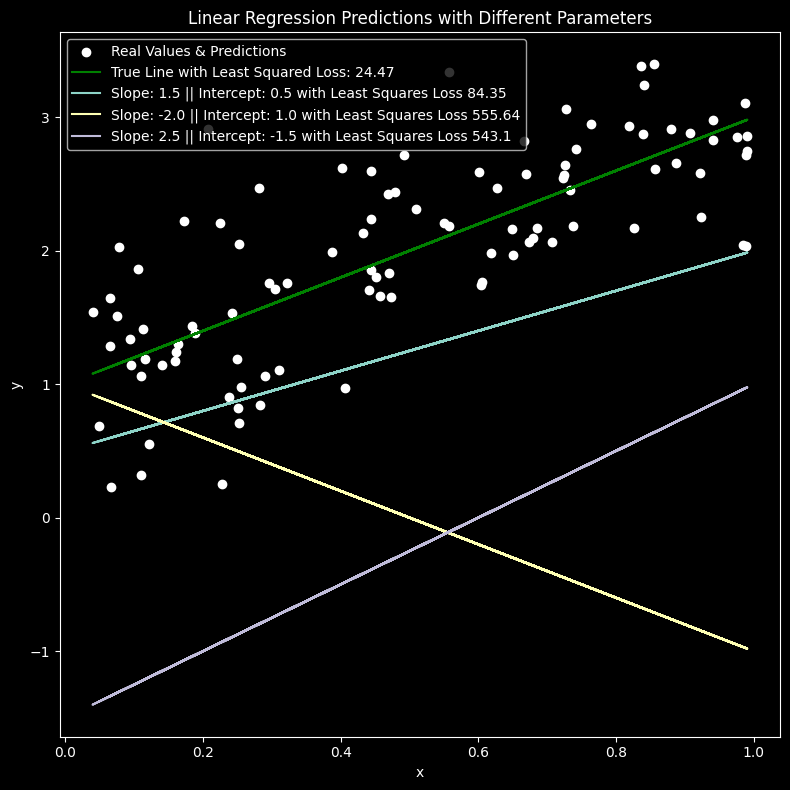

In [38]:
PlotPredictions(slopeList,interceptList)

In [39]:
slopeRandom = np.linspace(1.5,2.5,20)
interceptRandom = np.linspace(0.5,1.5,20)

In [40]:
# for grid presentation
lossBase = np.zeros((slopeRandom.size,interceptRandom.size))

In [41]:
# for grid presentation
for sx,slope in enumerate(slopeRandom):
  for ix,intercept in enumerate(interceptRandom):
    lossBase[sx,ix] = LeastSquaresLoss(inputSample,groundTruth,slope,intercept)

In [42]:
slopeGrid,interceptGrid = np.meshgrid(slopeRandom,interceptRandom)

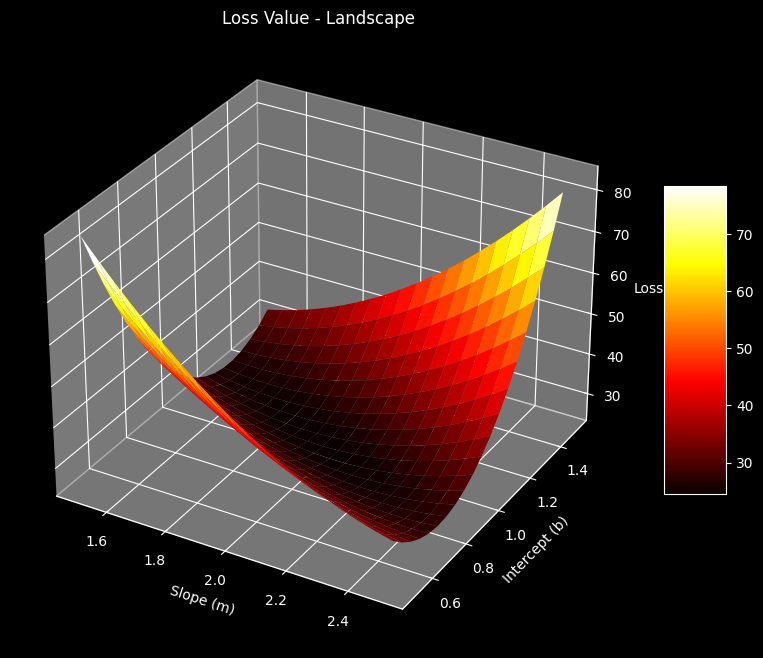

In [43]:
figure = plt.figure(figsize=(8,8))
axs = figure.add_subplot(111,projection="3d")
surface = axs.plot_surface(
    slopeGrid,
    interceptGrid,
    lossBase.T,
    cmap="hot",
    edgecolor="none"
)
axs.set_title("Loss Value - Landscape")
axs.set_xlabel("Slope (m)")
axs.set_ylabel("Intercept (b)")
axs.set_zlabel("Loss")
figure.colorbar(surface,shrink=0.4,aspect=5)
plt.tight_layout()
plt.show()

In [48]:
testSlope = 1.6
testIntercept = -0.8

In [44]:
slopeMesh,interceptMesh = np.meshgrid(
    np.arange(0.0,0.2,0.02),
    np.arange(-1.0,1.0,0.02)
)

In [45]:
allLoss = np.zeros_like(interceptMesh)

In [47]:
for idx,interceptTemp in np.ndenumerate(interceptMesh):
  allLoss[idx] = LeastSquaresLoss(inputSample,groundTruth,slopeMesh[idx],interceptMesh[idx])

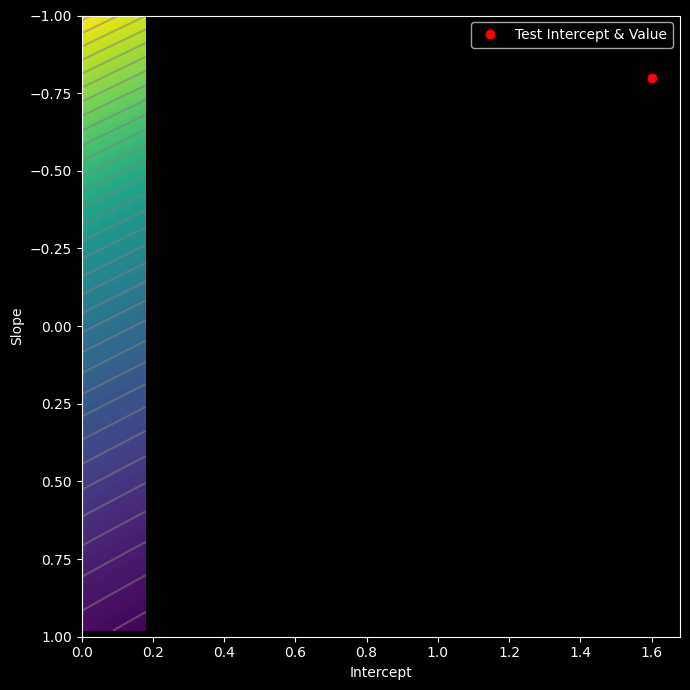

In [50]:
figure = plt.figure(figsize=(8,8))
axs = plt.axes()
figure.set_size_inches(7,7)
levels = 256
axs.contourf(
    slopeMesh,
    interceptMesh,
    allLoss,
    levels
)
levels = 40
axs.contour(
    slopeMesh,
    interceptMesh,
    allLoss,
    levels,
    colors=["#80808080"]
)
axs.set_xlabel("Intercept")
axs.set_ylabel("Slope")
axs.set_ylim([1,-1])
axs.plot(testSlope,testIntercept,"ro",label="Test Intercept & Value")
plt.tight_layout()
plt.legend()
plt.show()